from https://github.com/astoeckl/mediumchess

In [16]:
import chess

In [17]:
import chess.svg

In [18]:
from IPython.display import SVG

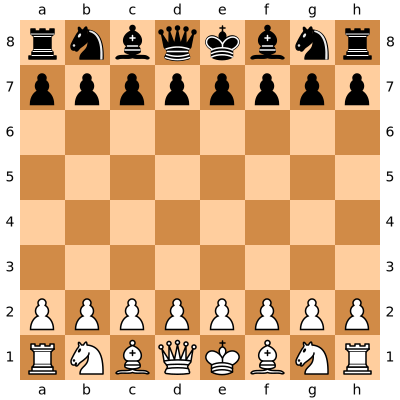

In [19]:
board = chess.Board()
SVG(chess.svg.board(board=board, size=400))

The function returns -9999 if white is mated, 9999 if black is mated and 0 for a draw. In all other situations, it returns an evaluation as the sum of the material and the sum of position values via piece-square tables. If black is in turn then the negative value is returned as needed by the negamax implementation of the search 

In [20]:
def evaluate_board():

  if board.is_checkmate():
    if board.turn:
      return -9999
    else:
      return 9999
  
  if board.is_stalemate():
    return 0
  
  if board.is_insufficient_material():
    return 0
  
  wp = len(board.pieces(chess.PAWN, chess.WHITE))
  bp = len(board.pieces(chess.PAWN, chess.BLACK))
  wn = len(board.pieces(chess.KNIGHT, chess.WHITE))
  bn = len(board.pieces(chess.KNIGHT, chess.BLACK))
  wb = len(board.pieces(chess.BISHOP, chess.WHITE))
  bb = len(board.pieces(chess.BISHOP, chess.BLACK))
  wr = len(board.pieces(chess.ROOK, chess.WHITE))
  br = len(board.pieces(chess.ROOK, chess.BLACK))
  wq = len(board.pieces(chess.QUEEN, chess.WHITE))
  bq = len(board.pieces(chess.QUEEN, chess.BLACK))

  material = 100*(wp-bp)+320*(wn-bn)+330*(wb-bb)+500*(wr-br)+900*(wq-bq)
    
  pawnsq = sum([pawntable[i] for i in board.pieces(chess.PAWN, chess.WHITE)])
  pawnsq= pawnsq + sum([-pawntable[chess.square_mirror(i)] 
                                    for i in board.pieces(chess.PAWN, chess.BLACK)])
  
  knightsq = sum([knightstable[i] for i in board.pieces(chess.KNIGHT, chess.WHITE)])
  knightsq = knightsq + sum([-knightstable[chess.square_mirror(i)] 
                                    for i in board.pieces(chess.KNIGHT, chess.BLACK)])
    
  bishopsq= sum([bishopstable[i] for i in board.pieces(chess.BISHOP, chess.WHITE)])
  bishopsq= bishopsq + sum([-bishopstable[chess.square_mirror(i)] 
                                    for i in board.pieces(chess.BISHOP, chess.BLACK)])
  
  rooksq = sum([rookstable[i] for i in board.pieces(chess.ROOK, chess.WHITE)]) 
  rooksq = rooksq + sum([-rookstable[chess.square_mirror(i)] 
                                    for i in board.pieces(chess.ROOK, chess.BLACK)])
  queensq = sum([queenstable[i] for i in board.pieces(chess.QUEEN, chess.WHITE)]) 
  queensq = queensq + sum([-queenstable[chess.square_mirror(i)] 
                                    for i in board.pieces(chess.QUEEN, chess.BLACK)])
  kingsq = sum([kingstable[i] for i in board.pieces(chess.KING, chess.WHITE)]) 
  kingsq = kingsq + sum([-kingstable[chess.square_mirror(i)] 
                                    for i in board.pieces(chess.KING, chess.BLACK)])
    
  eval = material + pawnsq + knightsq + bishopsq+ rooksq+ queensq + kingsq
  if board.turn:
      return eval
  else:
      return -eval

I used the piece-squre tables from https://www.chessprogramming.org/Simplified_Evaluation_Function. For each sort of piece a different table is defined. If the value on a square is positive then the program tries to place a piece on that square if the value is negative it avoids to move to that square. The value of the whole position is calculated by summing over all pieces of both sides.

For pawns the program is encouraged to advance the pawns. Additionally we try to discourage the engine from leaving central pawns unmoved. Pawns on f2, g2 or c2 and b2 should not move zu f3 etc.

Knights are simply encouraged to go to the center. Standing on the edge is a bad idea.

Bishops should avoid corners and borders.

Rooks should occupy the 7th rank and avoid a, h columns

Queens should avoid corners and borders and stay in the center.

Kings should stand behind the pawn shelter. This is only good for opening and middle game. The endgame needs a different table. I will do this in a future enhancement of the program.

In [21]:

pawntable = [
 0,  0,  0,  0,  0,  0,  0,  0,
 5, 10, 10,-20,-20, 10, 10,  5,
 5, -5,-10,  0,  0,-10, -5,  5,
 0,  0,  0, 20, 20,  0,  0,  0,
 5,  5, 10, 25, 25, 10,  5,  5,
10, 10, 20, 30, 30, 20, 10, 10,
50, 50, 50, 50, 50, 50, 50, 50,
 0,  0,  0,  0,  0,  0,  0,  0]

knightstable = [
-50,-40,-30,-30,-30,-30,-40,-50,
-40,-20,  0,  5,  5,  0,-20,-40,
-30,  5, 10, 15, 15, 10,  5,-30,
-30,  0, 15, 20, 20, 15,  0,-30,
-30,  5, 15, 20, 20, 15,  5,-30,
-30,  0, 10, 15, 15, 10,  0,-30,
-40,-20,  0,  0,  0,  0,-20,-40,
-50,-40,-30,-30,-30,-30,-40,-50]

bishopstable = [
-20,-10,-10,-10,-10,-10,-10,-20,
-10,  5,  0,  0,  0,  0,  5,-10,
-10, 10, 10, 10, 10, 10, 10,-10,
-10,  0, 10, 10, 10, 10,  0,-10,
-10,  5,  5, 10, 10,  5,  5,-10,
-10,  0,  5, 10, 10,  5,  0,-10,
-10,  0,  0,  0,  0,  0,  0,-10,
-20,-10,-10,-10,-10,-10,-10,-20]

rookstable = [
  0,  0,  0,  5,  5,  0,  0,  0,
 -5,  0,  0,  0,  0,  0,  0, -5,
 -5,  0,  0,  0,  0,  0,  0, -5,
 -5,  0,  0,  0,  0,  0,  0, -5,
 -5,  0,  0,  0,  0,  0,  0, -5,
 -5,  0,  0,  0,  0,  0,  0, -5,
  5, 10, 10, 10, 10, 10, 10,  5,
 0,  0,  0,  0,  0,  0,  0,  0]

queenstable = [
-20,-10,-10, -5, -5,-10,-10,-20,
-10,  0,  0,  0,  0,  0,  0,-10,
-10,  5,  5,  5,  5,  5,  0,-10,
  0,  0,  5,  5,  5,  5,  0, -5,
 -5,  0,  5,  5,  5,  5,  0, -5,
-10,  0,  5,  5,  5,  5,  0,-10,
-10,  0,  0,  0,  0,  0,  0,-10,
-20,-10,-10, -5, -5,-10,-10,-20]

kingstable = [
 20, 30, 10,  0,  0, 10, 30, 20,
 20, 20,  0,  0,  0,  0, 20, 20,
-10,-20,-20,-20,-20,-20,-20,-10,
-20,-30,-30,-40,-40,-30,-30,-20,
-30,-40,-40,-50,-50,-40,-40,-30,
-30,-40,-40,-50,-50,-40,-40,-30,
-30,-40,-40,-50,-50,-40,-40,-30,
-30,-40,-40,-50,-50,-40,-40,-30]

In [22]:
def alphabeta( alpha, beta, depthleft ):
    bestscore = -9999
    if( depthleft == 0 ):
        return quiesce( alpha, beta )
    for move in board.legal_moves:
        board.push(move)   
        score = -alphabeta( -beta, -alpha, depthleft - 1 )
        board.pop()
        if( score >= beta ):
            return score
        if( score > bestscore ):
            bestscore = score
        if( score > alpha ):
            alpha = score   
    return bestscore

In [23]:

# this looks at athe horizon effect
def quiesce( alpha, beta ):
    stand_pat = evaluate_board()
    if( stand_pat >= beta ):
        return beta
    if( alpha < stand_pat ):
        alpha = stand_pat

    for move in board.legal_moves:
        if board.is_capture(move):
            board.push(move)        
            score = -quiesce( -beta, -alpha )
            board.pop()

            if( score >= beta ):
                return beta
            if( score > alpha ):
                alpha = score  
    return alpha

The function which implements the move selection in the root position consists of two parts. The first part tries to find a move in the opening book and gives it back. The "chess" library has a function to access opening books in the "Polyglot" format. I used the "bookfish" opening book which I downloaded from http://rebel13.nl/download/books.html. A random weighted move is selected from all possible moves of the book in this position.

The second part calculates the move if the book is empty. For each move in the position the search (alphabeta) is conducted and the best move is choosen.

In [24]:
import chess.polyglot

def selectmove(depth):
    try:
        move = chess.polyglot.MemoryMappedReader("bookfish.bin").weighted_choice(board).move()
        movehistory.append(move)
        return move
    except:
        bestMove = chess.Move.null()
        bestValue = -99999
        alpha = -100000
        beta = 100000
        for move in board.legal_moves:
            board.push(move)
            boardValue = -alphabeta(-beta, -alpha, depth-1)
            if boardValue > bestValue:
                bestValue = boardValue;
                bestMove = move
            if( boardValue > alpha ):
                alpha = boardValue
            board.pop()
        movehistory.append(bestMove)
        return bestMove

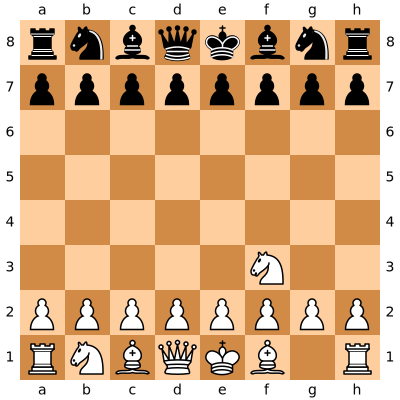

In [25]:
movehistory =[]
board = chess.Board()
mov = selectmove(3)
board.push(mov)
SVG(chess.svg.board(board=board,size=400))

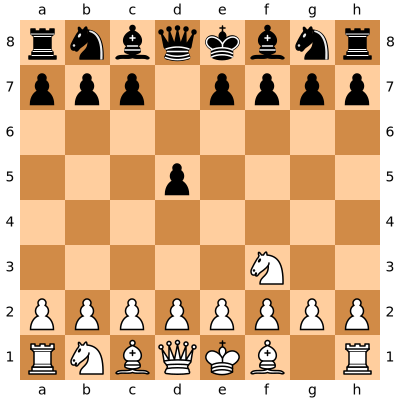

In [26]:

board.push_san("d5")
SVG(chess.svg.board(board=board,size=400))


In [27]:
!apt-get install stockfish

Reading package lists... Done
Building dependency tree       
Reading state information... Done
stockfish is already the newest version (8-3).
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.


In [28]:
#!find / -name *stockfish*

In [29]:
# import chess.pgn
# import datetime
# import chess.uci

# engine = chess.uci.popen_engine("/usr/games/stockfish")
# engine.uci()
# engine.name

# movehistory =[]
# game = chess.pgn.Game()
# game.headers["Event"] = "Example"
# game.headers["Site"] = "Linz"
# game.headers["Date"] = str(datetime.datetime.now().date())
# game.headers["Round"] = 1
# game.headers["White"] = "MyChess"
# game.headers["Black"] = "Stockfish9"
# board = chess.Board()
# while not board.is_game_over(claim_draw=True):
#     if board.turn:
#         move = selectmove(4)
#         board.push(move)       
#     else:
#         engine.position(board)
#         move = engine.go(movetime=1000).bestmove
#         movehistory.append(move)
#         board.push(move)
#     SVG(chess.svg.board(board=board,size=400))
    
# game.add_line(movehistory)
# game.headers["Result"] = str(board.result(claim_draw=True))
# print(game)
# print(game, file=open("test.pgn", "w"), end="\n\n")

# SVG(chess.svg.board(board=board,size=400))

selfplay

In [30]:
# import chess.pgn
# import datetime

# movehistory =[]
# game = chess.pgn.Game()
# game.headers["Event"] = "Example"
# game.headers["Site"] = "Linz"
# game.headers["Date"] = str(datetime.datetime.now().date())
# game.headers["Round"] = 1
# game.headers["White"] = "MyChess"
# game.headers["Black"] = "MyChess"
# board = chess.Board()
# while not board.is_game_over(claim_draw=True):
#     if board.turn:
#         move = selectmove(3)
#         board.push(move)       
#     else:
#         move = selectmove(3)
#         board.push(move)
#     SVG(chess.svg.board(board=board,size=400))   
    
# game.add_line(movehistory)
# game.headers["Result"] = str(board.result(claim_draw=True))
# print(game)
# print(game, file=open("selftest.pgn", "w"), end="\n\n")

# SVG(chess.svg.board(board=board,size=400))

incremental evaluation

I define a function to evaluate the actual position and store the value in a global variable. This funcion is called once at the beginning of a search.

In [31]:
def init_evaluate_board():
    global boardvalue
    
    wp = len(board.pieces(chess.PAWN, chess.WHITE))
    bp = len(board.pieces(chess.PAWN, chess.BLACK))
    wn = len(board.pieces(chess.KNIGHT, chess.WHITE))
    bn = len(board.pieces(chess.KNIGHT, chess.BLACK))
    wb = len(board.pieces(chess.BISHOP, chess.WHITE))
    bb = len(board.pieces(chess.BISHOP, chess.BLACK))
    wr = len(board.pieces(chess.ROOK, chess.WHITE))
    br = len(board.pieces(chess.ROOK, chess.BLACK))
    wq = len(board.pieces(chess.QUEEN, chess.WHITE))
    bq = len(board.pieces(chess.QUEEN, chess.BLACK))
    
    material = 100*(wp-bp)+320*(wn-bn)+330*(wb-bb)+500*(wr-br)+900*(wq-bq)
    
    pawnsq = sum([pawntable[i] for i in board.pieces(chess.PAWN, chess.WHITE)])
    pawnsq= pawnsq + sum([-pawntable[chess.square_mirror(i)] 
                                    for i in board.pieces(chess.PAWN, chess.BLACK)])
    knightsq = sum([knightstable[i] for i in board.pieces(chess.KNIGHT, chess.WHITE)])
    knightsq = knightsq + sum([-knightstable[chess.square_mirror(i)] 
                                    for i in board.pieces(chess.KNIGHT, chess.BLACK)])
    bishopsq= sum([bishopstable[i] for i in board.pieces(chess.BISHOP, chess.WHITE)])
    bishopsq= bishopsq + sum([-bishopstable[chess.square_mirror(i)] 
                                    for i in board.pieces(chess.BISHOP, chess.BLACK)])
    rooksq = sum([rookstable[i] for i in board.pieces(chess.ROOK, chess.WHITE)]) 
    rooksq = rooksq + sum([-rookstable[chess.square_mirror(i)] 
                                    for i in board.pieces(chess.ROOK, chess.BLACK)])
    queensq = sum([queenstable[i] for i in board.pieces(chess.QUEEN, chess.WHITE)]) 
    queensq = queensq + sum([-queenstable[chess.square_mirror(i)] 
                                    for i in board.pieces(chess.QUEEN, chess.BLACK)])
    kingsq = sum([kingstable[i] for i in board.pieces(chess.KING, chess.WHITE)]) 
    kingsq = kingsq + sum([-kingstable[chess.square_mirror(i)] 
                                    for i in board.pieces(chess.KING, chess.BLACK)])
    
    boardvalue = material + pawnsq + knightsq + bishopsq + rooksq + queensq + kingsq
    
    return boardvalue

In [32]:
def evaluate_board():
    
    if board.is_checkmate():
        if board.turn:
            return -9999
        else:
            return 9999
    if board.is_stalemate():
        return 0
    if board.is_insufficient_material():
        return 0
    
    eval = boardvalue
    if board.turn:
        return eval
    else:
        return -eval

In [33]:
def evaluate_board():
    
    if board.is_checkmate():
        if board.turn:
            return -9999
        else:
            return 9999
    if board.is_stalemate():
        return 0
    if board.is_insufficient_material():
        return 0
    
    eval = boardvalue
    if board.turn:
        return eval
    else:
        return -eval

In [34]:
piecetypes = [chess.PAWN, chess.KNIGHT, chess.BISHOP, chess.ROOK, chess.QUEEN, chess.KING ]
tables = [pawntable, knightstable, bishopstable, rookstable, queenstable, kingstable]
piecevalues = [100,320,330,500,900]

def update_eval(mov, side):
    global boardvalue
    
    #update piecequares
    movingpiece = board.piece_type_at(mov.from_square)
    if side:
        boardvalue = boardvalue - tables[movingpiece - 1][mov.from_square]
        #update castling
        if (mov.from_square == chess.E1) and (mov.to_square == chess.G1):
            boardvalue = boardvalue - rookstable[chess.H1]
            boardvalue = boardvalue + rookstable[chess.F1]
        elif (mov.from_square == chess.E1) and (mov.to_square == chess.C1):
            boardvalue = boardvalue - rookstable[chess.A1]
            boardvalue = boardvalue + rookstable[chess.D1]
    else:
        boardvalue = boardvalue + tables[movingpiece - 1][mov.from_square]
        #update castling
        if (mov.from_square == chess.E8) and (mov.to_square == chess.G8):
            boardvalue = boardvalue + rookstable[chess.H8]
            boardvalue = boardvalue - rookstable[chess.F8]
        elif (mov.from_square == chess.E8) and (mov.to_square == chess.C8):
            boardvalue = boardvalue + rookstable[chess.A8]
            boardvalue = boardvalue - rookstable[chess.D8]
        
    if side:
        boardvalue = boardvalue + tables[movingpiece - 1][mov.to_square]
    else:
        boardvalue = boardvalue - tables[movingpiece - 1][mov.to_square]
        
     
    #update material
    if mov.drop != None:
        if side:
            boardvalue = boardvalue + piecevalues[mov.drop-1]
        else:
            boardvalue = boardvalue - piecevalues[mov.drop-1]
            
    #update promotion
    if mov.promotion != None:
        if side:
            boardvalue = boardvalue + piecevalues[mov.promotion-1] - piecevalues[movingpiece-1]
            boardvalue = boardvalue - tables[movingpiece - 1][mov.to_square] \
                + tables[mov.promotion - 1][mov.to_square]
        else:
            boardvalue = boardvalue - piecevalues[mov.promotion-1] + piecevalues[movingpiece-1]
            boardvalue = boardvalue + tables[movingpiece - 1][mov.to_square] \
                - tables[mov.promotion - 1][mov.to_square]
            
            
    return mov

def make_move(mov):
    update_eval(mov, board.turn)
    board.push(mov)
    
    return mov

def unmake_move():
    mov = board.pop()
    update_eval(mov, not board.turn)
    
    return mov

In [35]:

def quiesce( alpha, beta ):
    stand_pat = evaluate_board()
    if( stand_pat >= beta ):
        return beta
    if( alpha < stand_pat ):
        alpha = stand_pat

    for move in board.legal_moves:
        if board.is_capture(move):
            make_move(move)        
            score = -quiesce( -beta, -alpha )
            unmake_move()

            if( score >= beta ):
                return beta
            if( score > alpha ):
                alpha = score  
    return alpha

def alphabeta( alpha, beta, depthleft ):
    bestscore = -9999
    if( depthleft == 0 ):
        return quiesce( alpha, beta )
    for move in board.legal_moves:
        make_move(move)   
        score = -alphabeta( -beta, -alpha, depthleft - 1 )
        unmake_move()
        if( score >= beta ):
            return score
        if( score > bestscore ):
            bestscore = score
        if( score > alpha ):
            alpha = score   
    return bestscore

import chess.polyglot

def selectmove(depth):
    try:
        move = chess.polyglot.MemoryMappedReader("bookfish.bin").weighted_choice(board).move()
        movehistory.append(move)
        return move
    except:
        bestMove = chess.Move.null()
        bestValue = -99999
        alpha = -100000
        beta = 100000
        for move in board.legal_moves:
            make_move(move)
            boardValue = -alphabeta(-beta, -alpha, depth-1)
            if boardValue > bestValue:
                bestValue = boardValue;
                bestMove = move
            if( boardValue > alpha ):
                alpha = boardValue
            unmake_move()
        movehistory.append(bestMove)
        return bestMove

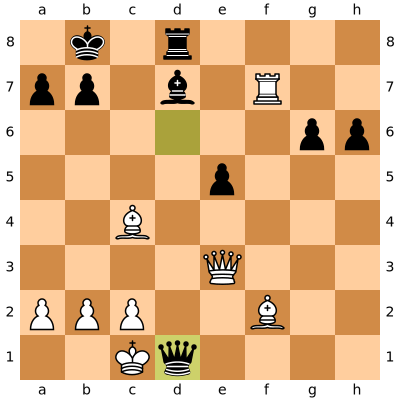

In [36]:
# takes a long time

board = chess.Board("1k1r4/pp1b1R2/3q2pp/4p3/2B5/4Q3/PPP2B2/2K5 b - - 0 1")
boardvalue = init_evaluate_board()

mov = selectmove(5)
make_move(mov)
SVG(chess.svg.board(board=board,size=400,lastmove=mov))

In [37]:
positions = [
"1k1r4/pp1b1R2/3q2pp/4p3/2B5/4Q3/PPP2B2/2K5 b - - 0 1",
"3r1k2/4npp1/1ppr3p/p6P/P2PPPP1/1NR5/5K2/2R5 w - - 0 1",
"2q1rr1k/3bbnnp/p2p1pp1/2pPp3/PpP1P1P1/1P2BNNP/2BQ1PRK/7R b - - 0 1",
"rnbqkb1r/p3pppp/1p6/2ppP3/3N4/2P5/PPP1QPPP/R1B1KB1R w KQkq - 0 1",
"r1b2rk1/2q1b1pp/p2ppn2/1p6/3QP3/1BN1B3/PPP3PP/R4RK1 w - - 0 1",
"2r3k1/pppR1pp1/4p3/4P1P1/5P2/1P4K1/P1P5/8 w - - 0 1",
"1nk1r1r1/pp2n1pp/4p3/q2pPp1N/b1pP1P2/B1P2R2/2P1B1PP/R2Q2K1 w - - 0 1",
"4b3/p3kp2/6p1/3pP2p/2pP1P2/4K1P1/P3N2P/8 w - - 0 1",
"2kr1bnr/pbpq4/2n1pp2/3p3p/3P1P1B/2N2N1Q/PPP3PP/2KR1B1R w - - 0 1",
"3rr1k1/pp3pp1/1qn2np1/8/3p4/PP1R1P2/2P1NQPP/R1B3K1 b - - 0 1",
"2r1nrk1/p2q1ppp/bp1p4/n1pPp3/P1P1P3/2PBB1N1/4QPPP/R4RK1 w - - 0 1",
"r3r1k1/ppqb1ppp/8/4p1NQ/8/2P5/PP3PPP/R3R1K1 b - - 0 1",
"r2q1rk1/4bppp/p2p4/2pP4/3pP3/3Q4/PP1B1PPP/R3R1K1 w - - 0 1",
"rnb2r1k/pp2p2p/2pp2p1/q2P1p2/8/1Pb2NP1/PB2PPBP/R2Q1RK1 w - - 0 1",
"2r3k1/1p2q1pp/2b1pr2/p1pp4/6Q1/1P1PP1R1/P1PN2PP/5RK1 w - - 0 1",
"r1bqkb1r/4npp1/p1p4p/1p1pP1B1/8/1B6/PPPN1PPP/R2Q1RK1 w kq - 0 1",
"r2q1rk1/1ppnbppp/p2p1nb1/3Pp3/2P1P1P1/2N2N1P/PPB1QP2/R1B2RK1 b - - 0 1",
"r1bq1rk1/pp2ppbp/2np2p1/2n5/P3PP2/N1P2N2/1PB3PP/R1B1QRK1 b - - 0 1",
"3rr3/2pq2pk/p2p1pnp/8/2QBPP2/1P6/P5PP/4RRK1 b - - 0 1",
"r4k2/pb2bp1r/1p1qp2p/3pNp2/3P1P2/2N3P1/PPP1Q2P/2KRR3 w - - 0 1",
"3rn2k/ppb2rpp/2ppqp2/5N2/2P1P3/1P5Q/PB3PPP/3RR1K1 w - - 0 1",
"2r2rk1/1bqnbpp1/1p1ppn1p/pP6/N1P1P3/P2B1N1P/1B2QPP1/R2R2K1 b - - 0 1",
"r1bqk2r/pp2bppp/2p5/3pP3/P2Q1P2/2N1B3/1PP3PP/R4RK1 b kq - 0 1",
"r2qnrnk/p2b2b1/1p1p2pp/2pPpp2/1PP1P3/PRNBB3/3QNPPP/5RK1 w - - 0 1",
]
solutions = ["Qd1+","d5","f5","e6","a4","g6","Nf6","f5","f5","Ne5","f4","Bf5","b4",
             "Qd2 Qe1","Qxg7+","Ne4","h5","Nb3","Rxe4","g4","Nh6","Bxe4","f6","f4"]


d5
d5


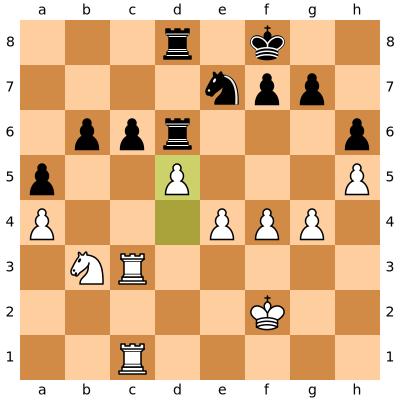

In [38]:
movehistory =[]
board = chess.Board(positions[1])
boardvalue = init_evaluate_board()

mov = selectmove(6)
print(solutions[1])
print(board.san(mov))

make_move(mov)
SVG(chess.svg.board(board=board,size=400,lastmove=mov))

In [ ]:
depth = 5
solved = 0
for i in range(24):
    movehistory =[]
    board = chess.Board(positions[i])
    boardvalue = init_evaluate_board()

    mov = selectmove(depth)
    print("Move problem " + str(i+1) + " " + board.san(mov) + " / Solution: " + solutions[i])

    if str(board.san(mov)) in str(solutions[i]):
        solved = solved + 1
        print("OK")
    else:
        print("wrong")

print("Number of correct solved: " + str(solved))

Move problem 1 Qd1+ / Solution: Qd1+
OK
Move problem 2 d5 / Solution: d5
OK
Move problem 3 Kg8 / Solution: f5
wrong
Move problem 4 a4 / Solution: e6
wrong
Move problem 5 a4 / Solution: a4
OK
Move problem 6 g6 / Solution: g6
OK
